libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

reading dataset

In [ ]:
df=pd.read_csv('/content/E-commerce Customer Behavior - Sheet1.csv')
df.head()

,Customer ID,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level
0,101,Female,29,New York,Gold,1120.20,14,4.6,True,25,Satisfied
1,102,Male,34,Los Angeles,Silver,780.50,11,4.1,False,18,Neutral
2,103,Female,43,Chicago,Bronze,510.75,9,3.4,True,42,Unsatisfied
3,104,Male,30,San Francisco,Gold,1480.30,19,4.7,False,12,Satisfied
4,105,Male,27,Miami,Silver,720.40,13,4.0,True,55,Unsatisfied


dealing with categorical data

In [ ]:
from sklearn.preprocessing import LabelEncoder


encoder = LabelEncoder()

df['Gender'] = encoder.fit_transform(df['Gender'])
df['City'] = encoder.fit_transform(df['City'])
df['Membership Type'] = encoder.fit_transform(df['Membership Type'])
df['Discount Applied'] = encoder.fit_transform(df['Discount Applied'])
df['Satisfaction Level'] = encoder.fit_transform(df['Satisfaction Level'])
df

,Customer ID,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level
0,101,0,29,4,1,1120.20,14,4.6,1,25,1
1,102,1,34,2,2,780.50,11,4.1,0,18,0
2,103,0,43,0,0,510.75,9,3.4,1,42,2
3,104,1,30,5,1,1480.30,19,4.7,0,12,1
4,105,1,27,3,2,720.40,13,4.0,1,55,2
...,...,...,...,...,...,...,...,...,...,...,...
345,446,1,32,3,2,660.30,10,3.8,1,42,2
346,447,0,36,1,0,470.50,8,3.0,0,27,0
347,448,0,30,4,1,1190.80,16,4.5,1,28,1
348,449,1,34,2,2,780.20,11,4.2,0,21,0


selecting items for clustering

In [ ]:
features = df[['Total Spend', 'Items Purchased', 'Average Rating', 'Days Since Last Purchase']]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

Perform K-means clustering

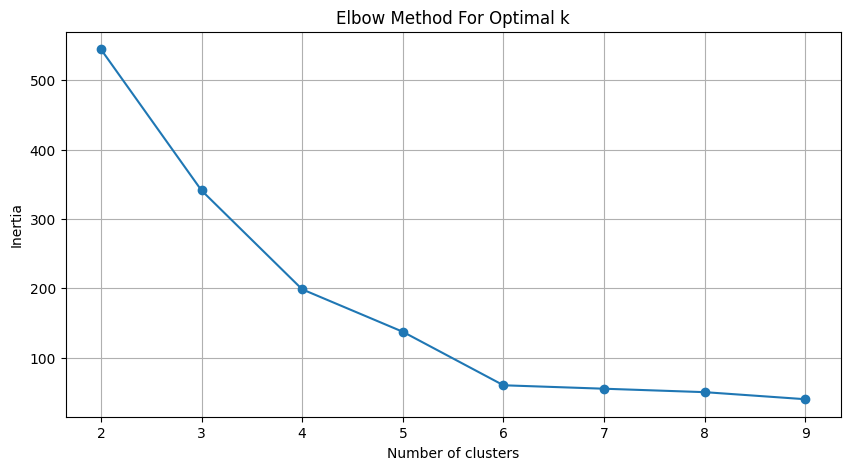

In [ ]:
inertia = []
silhouette_scores = []

for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(scaled_features, kmeans.labels_))

# Plotting the Elbow method
plt.figure(figsize=(10, 5))
plt.plot(range(2, 10), inertia, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.grid()
plt.show()


fit k-means model

In [ ]:
optimal_k =
final_kmeans = KMeans(n_clusters=optimal_k, random_state=0)
df['Cluster'] = final_kmeans.fit_predict(scaled_features)


print(df.groupby('Cluster').mean())


         Customer ID    Gender        Age      City  Membership Type  \
Cluster                                                                
0         274.829060  0.504274  32.427350  2.991453         1.504274   
1         275.862069  0.491379  35.482759  1.500000         1.000000   
2         275.067797  1.000000  29.152542  4.983051         1.000000   
3         276.568966  0.000000  36.706897  1.000000         0.000000   

         Total Spend  Items Purchased  Average Rating  Discount Applied  \
Cluster                                                                   
0         983.337607        13.444444        4.354701          0.495726   
1         595.136207        10.525862        3.692241          1.000000   
2        1455.549153        19.949153        4.808475          0.016949   
3         446.894828         7.568966        3.193103          0.000000   

         Days Since Last Purchase  Satisfaction Level  
Cluster                                                
0   

visulisation of clusters

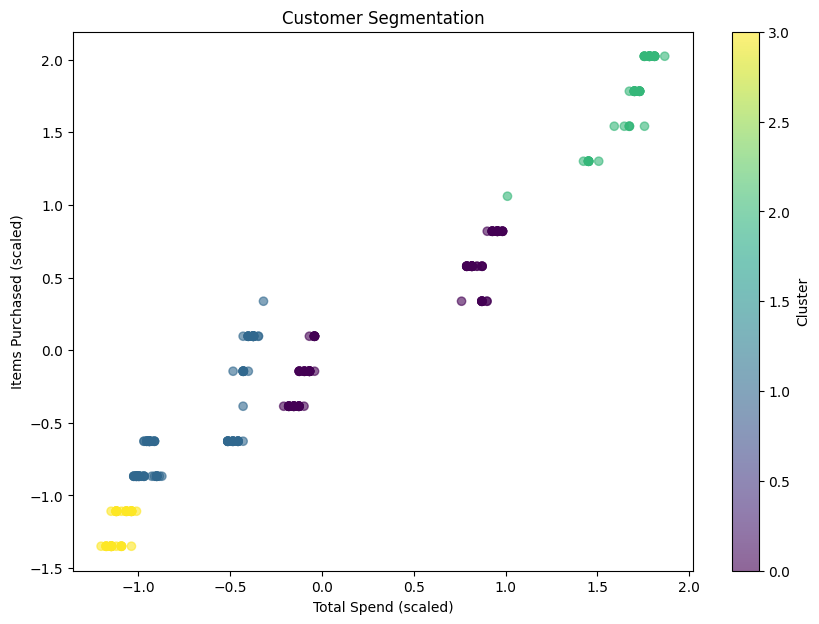

In [ ]:
plt.figure(figsize=(10, 7))
plt.scatter(scaled_features[:, 0], scaled_features[:, 1], c=df['Cluster'], cmap='viridis', alpha=0.6)
plt.title('Customer Segmentation')
plt.xlabel('Total Spend (scaled)')
plt.ylabel('Items Purchased (scaled)')
plt.colorbar(label='Cluster')
plt.show()
